In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [4]:
data = pd.read_csv('full_data_with_dates.csv')

#### Getting data for Manchester

In [5]:
small_data = data[['Latitude', 'Longitude', 'Date', 'Month']]

In [6]:
factor_lat = 0.00898892564 # KMs in 1 degree lat
factor_lon = 0.01424562303 # KMs in 1 degree lon

In [7]:
lat_max = 53.483959 + 6*factor_lat
lat_min = 53.483959 - 6*factor_lat
lon_min = -2.244644 - 6*factor_lon
lon_max = -2.244644 + 6*factor_lon

In [8]:
manchester = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Getting data for Birmingham

In [9]:
lat_max = 52.489471 + 6*factor_lat
lat_min = 52.489471 - 6*factor_lat
lon_min = -1.898575 - 6*factor_lon
lon_max = -1.898575 + 6*factor_lon

In [10]:
birmingham = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Getting data for Oxford

In [11]:
lat_max = 51.752022 + 6*factor_lat
lat_min = 51.752022 - 6*factor_lat
lon_min = -1.257677 - 6*factor_lon
lon_max = -1.257677 + 6*factor_lon

In [12]:
oxford = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Getting data for Nottingham

In [13]:
lat_max = 52.953548 + 6*factor_lat
lat_min = 52.953548 - 6*factor_lat
lon_min = -1.151851 - 6*factor_lon
lon_max = -1.151851 + 6*factor_lon

In [14]:
nottingham = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Getting data for Northampton

In [15]:
lat_max = 52.240479 + 6*factor_lat
lat_min = 52.240479 - 6*factor_lat
lon_min = -0.902656 - 6*factor_lon
lon_max = -0.902656 + 6*factor_lon

In [16]:
northampton = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Getting data for London

In [17]:
lat_max = 51.509865 + 6*factor_lat
lat_min = 51.509865 - 6*factor_lat
lon_min = -0.118092 - 6*factor_lon
lon_max = -0.118092 + 6*factor_lon

In [18]:
london = small_data.loc[(small_data['Latitude'] < lat_max)&
                          (small_data['Latitude'] > lat_min)&
                          (small_data['Longitude'] < lon_max)&
                          (small_data['Longitude'] > lon_min)]

#### Analysis for the Winter Season

In [19]:
#manchester_winter = manchester[(manchester['Month']==12)|(manchester['Month']==1)|(manchester['Month']==2)]
#london_winter = london[(london['Month']==12)|(london['Month']==1)|(london['Month']==2)]
birmingham_winter = birmingham[(birmingham['Month']==12)|(birmingham['Month']==1)|(birmingham['Month']==2)]
oxford_winter = oxford[(oxford['Month']==12)|(oxford['Month']==1)|(oxford['Month']==2)]
nottingham_winter = nottingham[(nottingham['Month']==12)|(nottingham['Month']==1)|(nottingham['Month']==2)]
northampton_winter = northampton[(northampton['Month']==12)|(northampton['Month']==1)|(northampton['Month']==2)]

In [20]:
# path1 = pd.merge(manchester_winter, london_winter, on='Date', how='outer', suffixes=['ma','lo'])
path1 = pd.merge(northampton_winter, nottingham_winter, on='Date', how='outer', suffixes=['ox','no'])
# path1 = pd.merge(path1, oxford_winter, on='Date', how='outer', suffixes=['y','ox'])

In [21]:
path1 = path1[['Date','Monthox']]

In [22]:
# path2 = pd.merge(manchester_winter, london_winter, on='Date', how='outer', suffixes=['ma','lo'])
path2 = pd.merge(oxford_winter, birmingham_winter, on='Date', how='outer', suffixes=['no','bi'])
# path2 = pd.merge(path2, northampton_winter, on='Date', how='outer', suffixes=['y','no'])

In [23]:
path2 = path2[['Date','Monthno']]

In [24]:
path1_dist = list(path1.groupby(['Date']).count().Monthox)
path2_dist = list(path2.groupby(['Date']).count().Monthno)

In [25]:
path1_dist = list(filter(lambda a: a!=0, path1_dist))
path2_dist = list(filter(lambda a: a!=0, path2_dist))

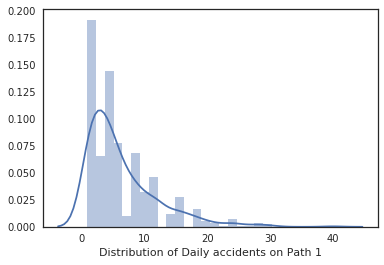

In [27]:
sns.distplot(path1_dist, axlabel='Distribution of Daily accidents on Path 1')

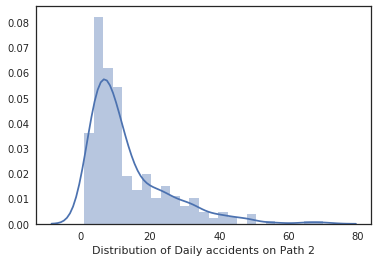

In [29]:
sns.distplot(path2_dist, axlabel='Distribution of Daily accidents on Path 2')

#### Confidence Intervals test

In [33]:
z_score = 1.645
path1_var = np.var(path1_dist)
path2_var = np.var(path2_dist)
ci_max = (np.mean(path1_dist) - np.mean(path2_dist)) + (z_score*np.sqrt(path1_var+path2_var))
ci_min = (np.mean(path1_dist) - np.mean(path2_dist)) - (z_score*np.sqrt(path1_var+path2_var))

In [34]:
ci_max

13.894283669106718

In [35]:
ci_min

-27.91454193112864

Wald's test

In [36]:
statistic = (np.mean(path1_dist) - np.mean(path2_dist))/(np.sqrt(path1_var+path2_var))
statistic

-0.551637710696572

since the statistic for right tailed test is less than 1.64, we accept the Null Hypothesis

P value

In [37]:
p_value = stats.norm.cdf(statistic)
p_value

0.2905982970909463

Since P value is greater than 0.05, hence we accept the null hypothesis

In [38]:
stats.ks_2samp(path1_dist, path2_dist)

Ks_2sampResult(statistic=0.3413239780980656, pvalue=1.8900490744127683e-32)

Permutation test

In [40]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()
pooled = np.hstack([path1_dist, path2_dist])
delta = np.mean(path1_dist) - np.mean(path2_dist)
numSamples = 10000
estimates = list(map(lambda x: run_permutation_test(pooled,len(path1_dist),len(path2_dist),delta),range(numSamples)))
diffCount = len(np.where(estimates <= delta)[0])
hat_asl_perm = 1.0 - (float(diffCount)/float(numSamples))
hat_asl_perm

1.0

#### Analysis for the Summer Season

In [41]:
# manchester_winter = manchester[(manchester['Month']==6)|(manchester['Month']==7)|(manchester['Month']==8)]
# london_winter = london[(london['Month']==6)|(london['Month']==7)|(london['Month']==8)]
birmingham_winter = birmingham[(birmingham['Month']==6)|(birmingham['Month']==7)|(birmingham['Month']==8)]
oxford_winter = oxford[(oxford['Month']==6)|(oxford['Month']==7)|(oxford['Month']==8)]
nottingham_winter = nottingham[(nottingham['Month']==6)|(nottingham['Month']==7)|(nottingham['Month']==8)]
northampton_winter = northampton[(northampton['Month']==6)|(northampton['Month']==7)|(northampton['Month']==8)]

In [42]:
path1 = pd.merge(northampton_winter, nottingham_winter, on='Date', how='outer', suffixes=['ox','no'])

In [43]:
path1 = path1[['Date','Monthox']]

In [44]:
path2 = pd.merge(oxford_winter, birmingham_winter, on='Date', how='outer', suffixes=['no','bi'])

In [45]:
path2 = path2[['Date','Monthno']]

In [46]:
path1_dist = list(path1.groupby(['Date']).count().Monthox)
path2_dist = list(path2.groupby(['Date']).count().Monthno)

In [47]:
path1_dist = list(filter(lambda a: a!=0, path1_dist))
path2_dist = list(filter(lambda a: a!=0, path2_dist))

#### Confidence Intervals test

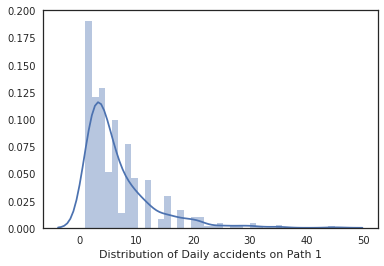

In [48]:
sns.distplot(path1_dist, axlabel='Distribution of Daily accidents on Path 1')

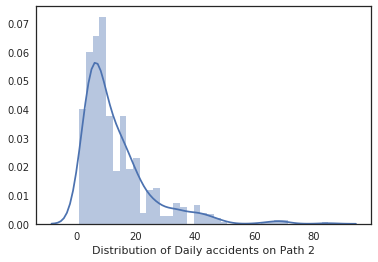

In [49]:
sns.distplot(path2_dist, axlabel='Distribution of Daily accidents on Path 2')

#### Confidence Intervals test

In [54]:
z_score = 1.645
path1_var = np.var(path1_dist)
path2_var = np.var(path2_dist)
ci_max = (np.mean(path1_dist) - np.mean(path2_dist)) + (z_score*np.sqrt(path1_var/len(path1_dist)+path2_var/len(path2_dist)))
ci_min = (np.mean(path1_dist) - np.mean(path2_dist)) - (z_score*np.sqrt(path1_var/len(path1_dist)+path2_var/len(path2_dist)))

In [55]:
ci_max

-5.973369866756846

In [56]:
ci_min

-7.612742130500596

Since the confidence interval doesn't contain a zero and is negative, hence path1 has lesser number of accidents than path2 during summer

Wald's test

In [58]:
statistic = (np.mean(path1_dist) - np.mean(path2_dist))/(np.sqrt(path1_var/len(path1_dist)+path2_var/len(path2_dist)))
statistic

-13.632751224209978

since the statistic for right tailed test is less than 1.64, we accept the Null Hypothesis

P value

In [59]:
p_value = stats.norm.cdf(statistic)
p_value

1.2787681413474255e-42

In [60]:
stats.ks_2samp(path1_dist, path2_dist)

Ks_2sampResult(statistic=0.3616913385676807, pvalue=9.626915702364944e-38)

Permutation test

In [61]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()
pooled = np.hstack([path1_dist, path2_dist])
delta = np.mean(path1_dist) - np.mean(path2_dist)
numSamples = 10000
estimates = list(map(lambda x: run_permutation_test(pooled,len(path1_dist),len(path2_dist),delta),range(numSamples)))
diffCount = len(np.where(estimates <= delta)[0])
hat_asl_perm = 1.0 - (float(diffCount)/float(numSamples))
hat_asl_perm

1.0